# Часть 1. EDA

### Импорты и загрузка dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

np.random.seed(49)

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Первичный анализ

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

удалим неинформативный признак Unnamed: 32 

In [6]:
del data['Unnamed: 32']

In [7]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
data.shape

(569, 32)

In [10]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

оцифруем целевую переменную

In [12]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [13]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

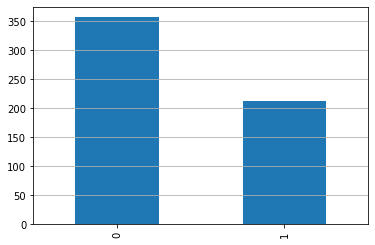

In [14]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [15]:
data['diagnosis'].value_counts(normalize = True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

### Визуализация

для отображения графиков без скроллов

In [16]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

#### гистограммы/распределения признаков

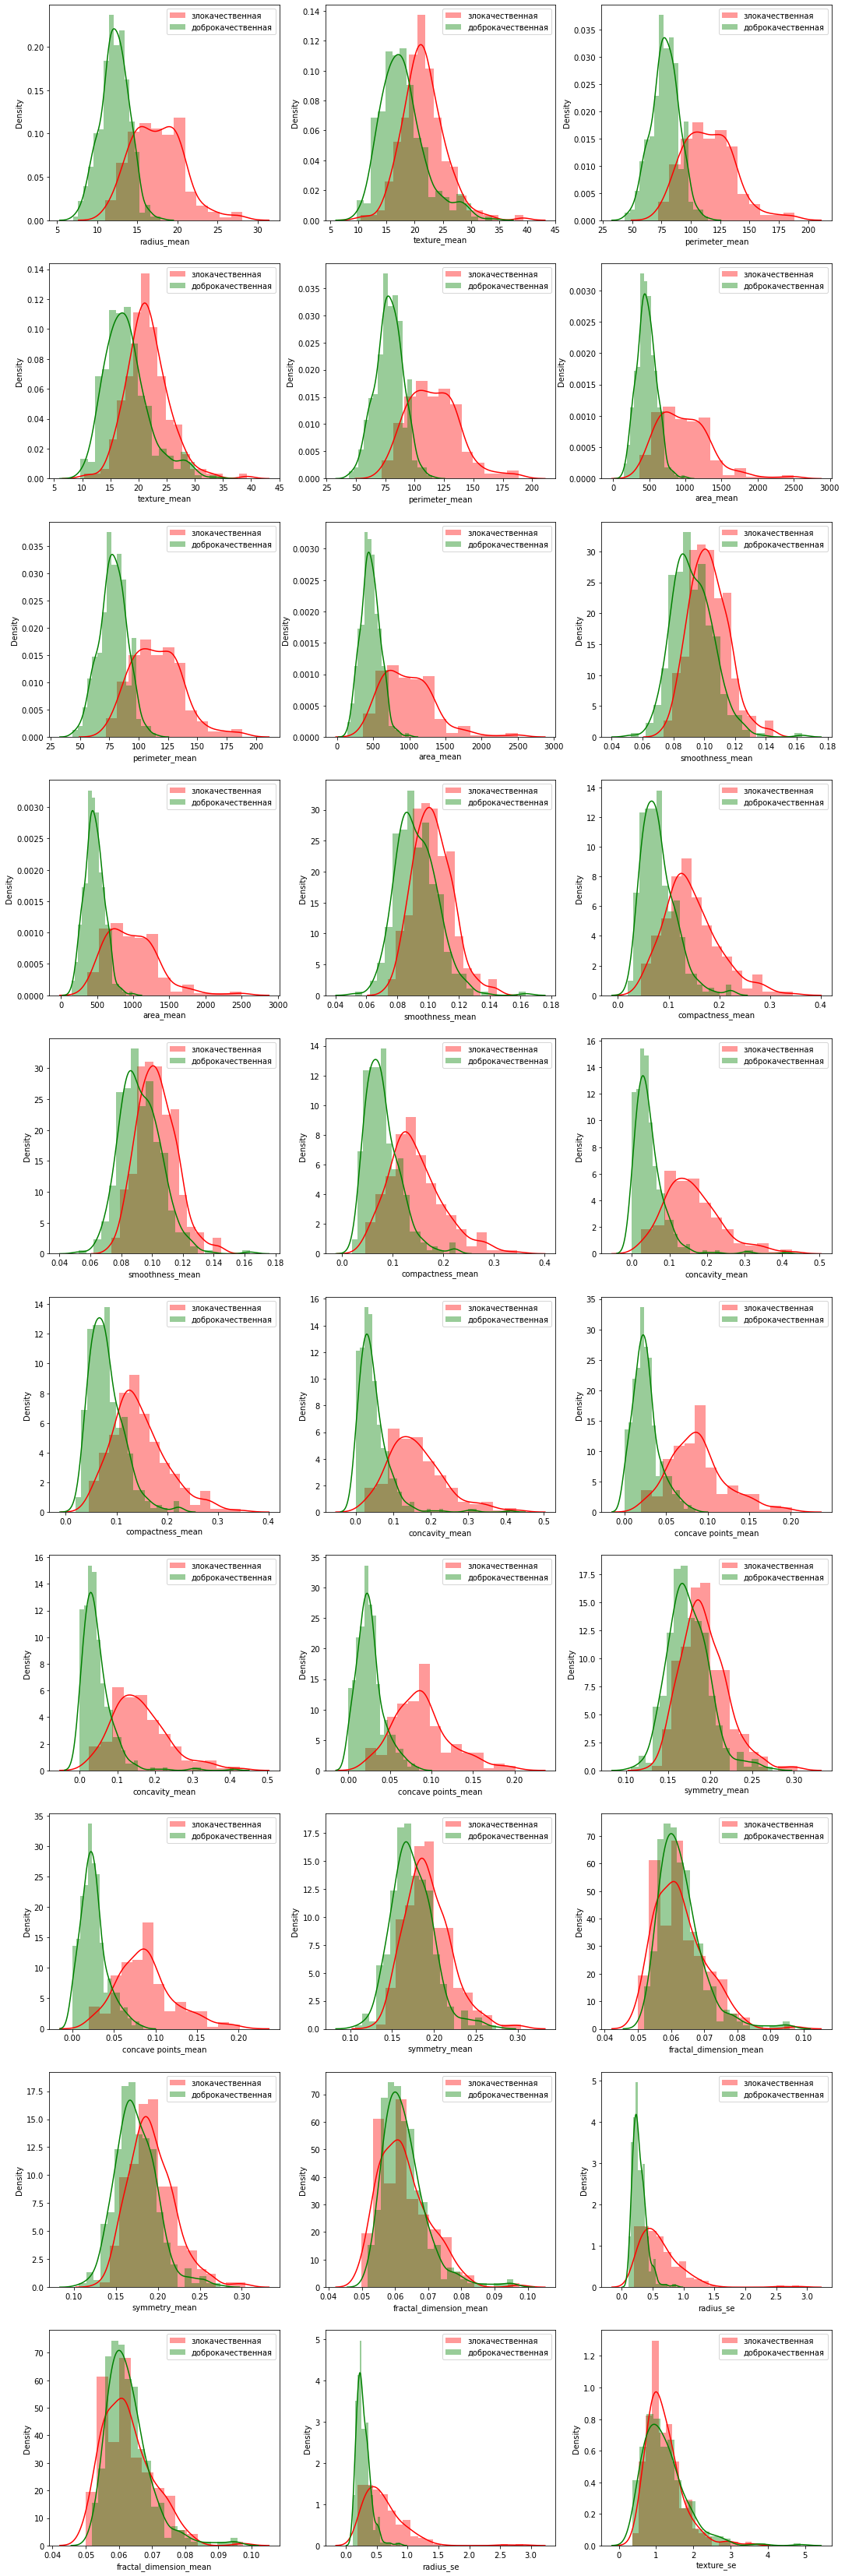

In [17]:
nrows = 10
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*6))

for i in range(nrows):
    for j in range(ncols):
        #plt.title('Плотности распределения признаков, красный - опухоль, зеленый - нет опухоли')
        #sns.title.set_text('First Plot')
        ax1 = sns.distplot(data[data['diagnosis'] == 1].iloc[:,i+j+2], ax = ax[i,j], color = 'red', label = 'злокачественная').legend()
        ax2 = sns.distplot(data[data['diagnosis'] == 0].iloc[:,i+j+2], ax = ax[i,j], color ='green',label = 'доброкачественная').legend()   
plt.show()

матрица корреляций

In [18]:
corr = data.corr()

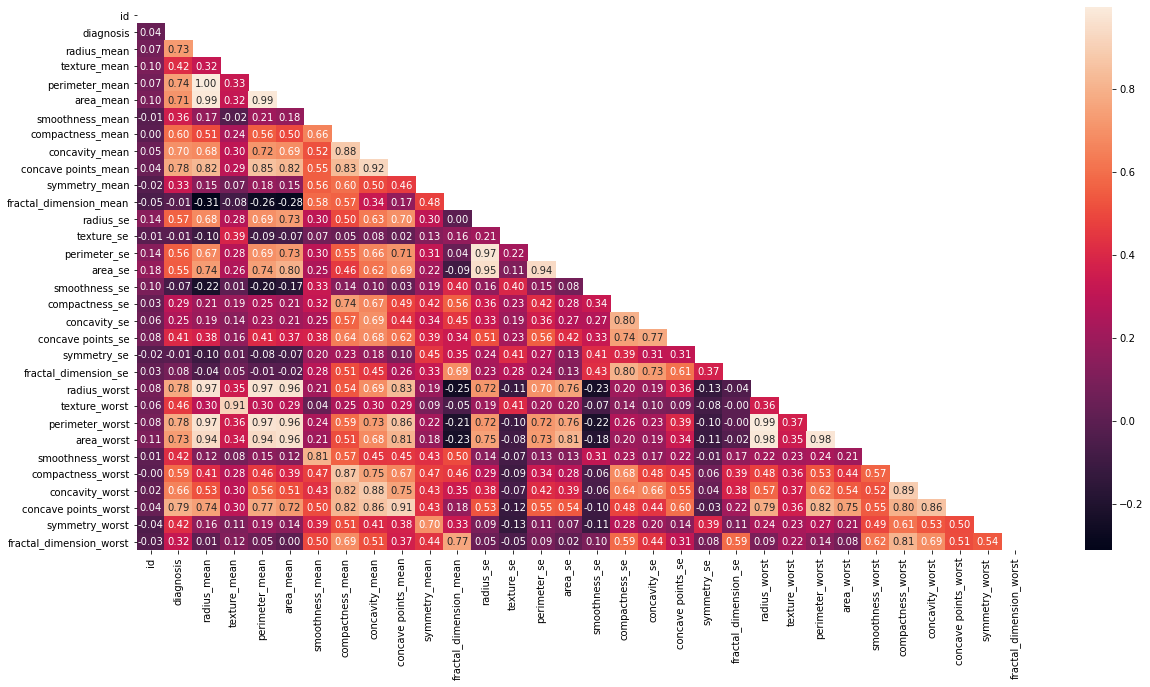

In [19]:
plt.figure(figsize=(20,10));
sns.heatmap(corr, annot=True, fmt='.2f',  mask = np.triu(np.ones_like(corr, dtype=bool)));

In [20]:
CorField = []
for i in corr:
    for j in corr.index[corr[i] > 0.8]:
        if i != j and [j,i] not in CorField:
            CorField.append([i,j])

In [21]:
len(CorField)

44

In [22]:
CorField

[['radius_mean', 'perimeter_mean'],
 ['radius_mean', 'area_mean'],
 ['radius_mean', 'concave points_mean'],
 ['radius_mean', 'radius_worst'],
 ['radius_mean', 'perimeter_worst'],
 ['radius_mean', 'area_worst'],
 ['texture_mean', 'texture_worst'],
 ['perimeter_mean', 'area_mean'],
 ['perimeter_mean', 'concave points_mean'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['perimeter_mean', 'area_worst'],
 ['area_mean', 'concave points_mean'],
 ['area_mean', 'area_se'],
 ['area_mean', 'radius_worst'],
 ['area_mean', 'perimeter_worst'],
 ['area_mean', 'area_worst'],
 ['smoothness_mean', 'smoothness_worst'],
 ['compactness_mean', 'concavity_mean'],
 ['compactness_mean', 'concave points_mean'],
 ['compactness_mean', 'compactness_worst'],
 ['compactness_mean', 'concavity_worst'],
 ['compactness_mean', 'concave points_worst'],
 ['concavity_mean', 'concave points_mean'],
 ['concavity_mean', 'concavity_worst'],
 ['concavity_mean', 'concave points_worst'],
 ['concav

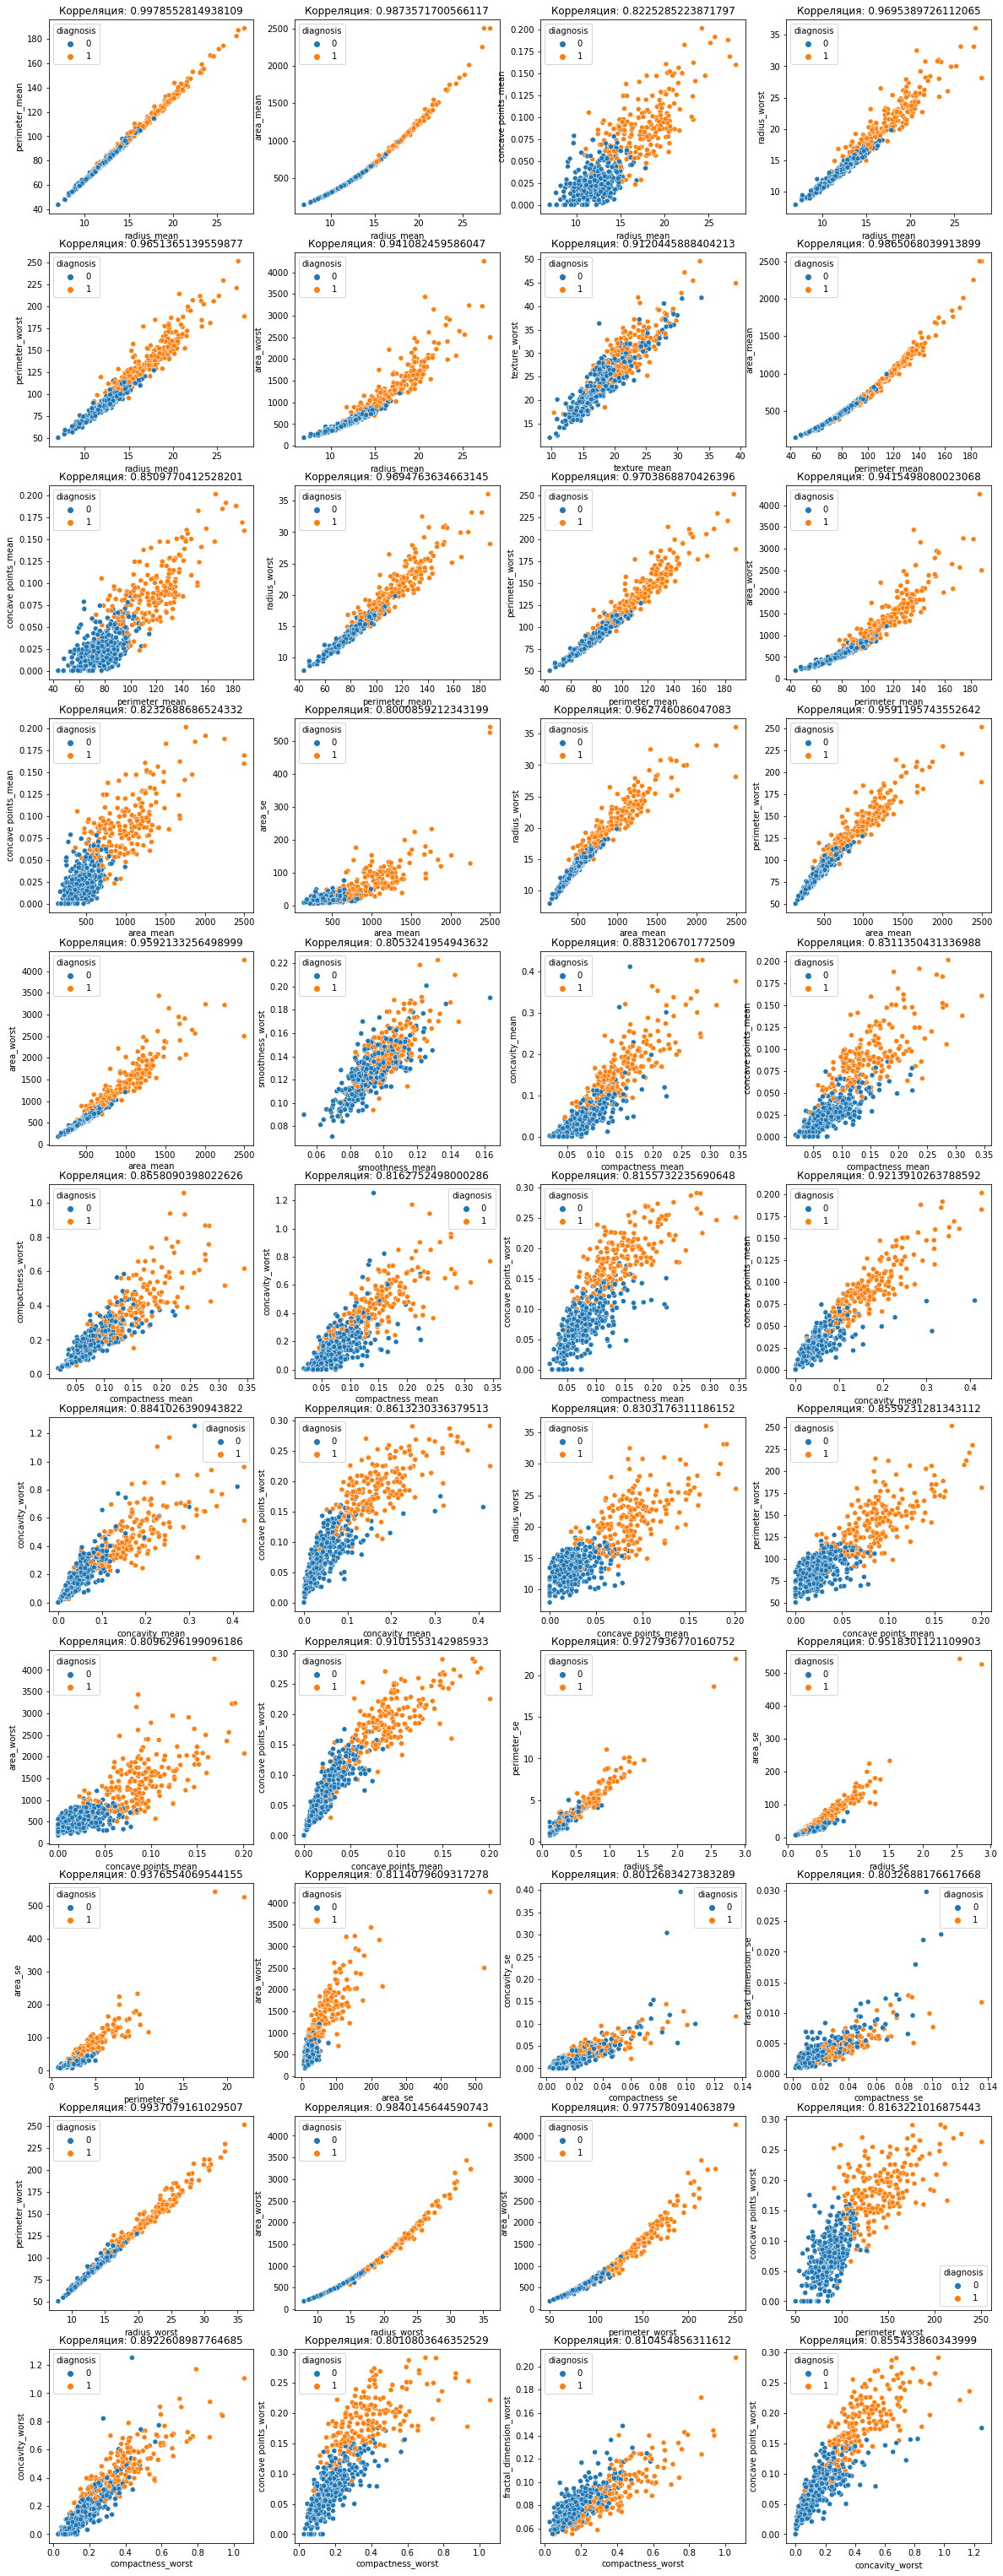

In [23]:
nrows = 11
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for i in range(len(CorField)):
    lb = 'Корреляция: ' + str(data[CorField[i][0]].corr(data[CorField[i][1]]))
    ax1 = sns.scatterplot(data=data, x=CorField[i][0], y=CorField[i][1],hue = 'diagnosis', ax = ax[i//ncols,i%ncols])
    ax1.title.set_text(lb)
plt.show()

Видим, что почти для всех сильно скорелированных признаков наблюдается явная линейная зависимость. Линейная зависимость равняется почти 1 между признаками, которые по законам геметрии являются линейно-зависимыми, например радиус и периметр, радиус и диаметр и пр.

построим boxplot для наших признаков, и посмотрим, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

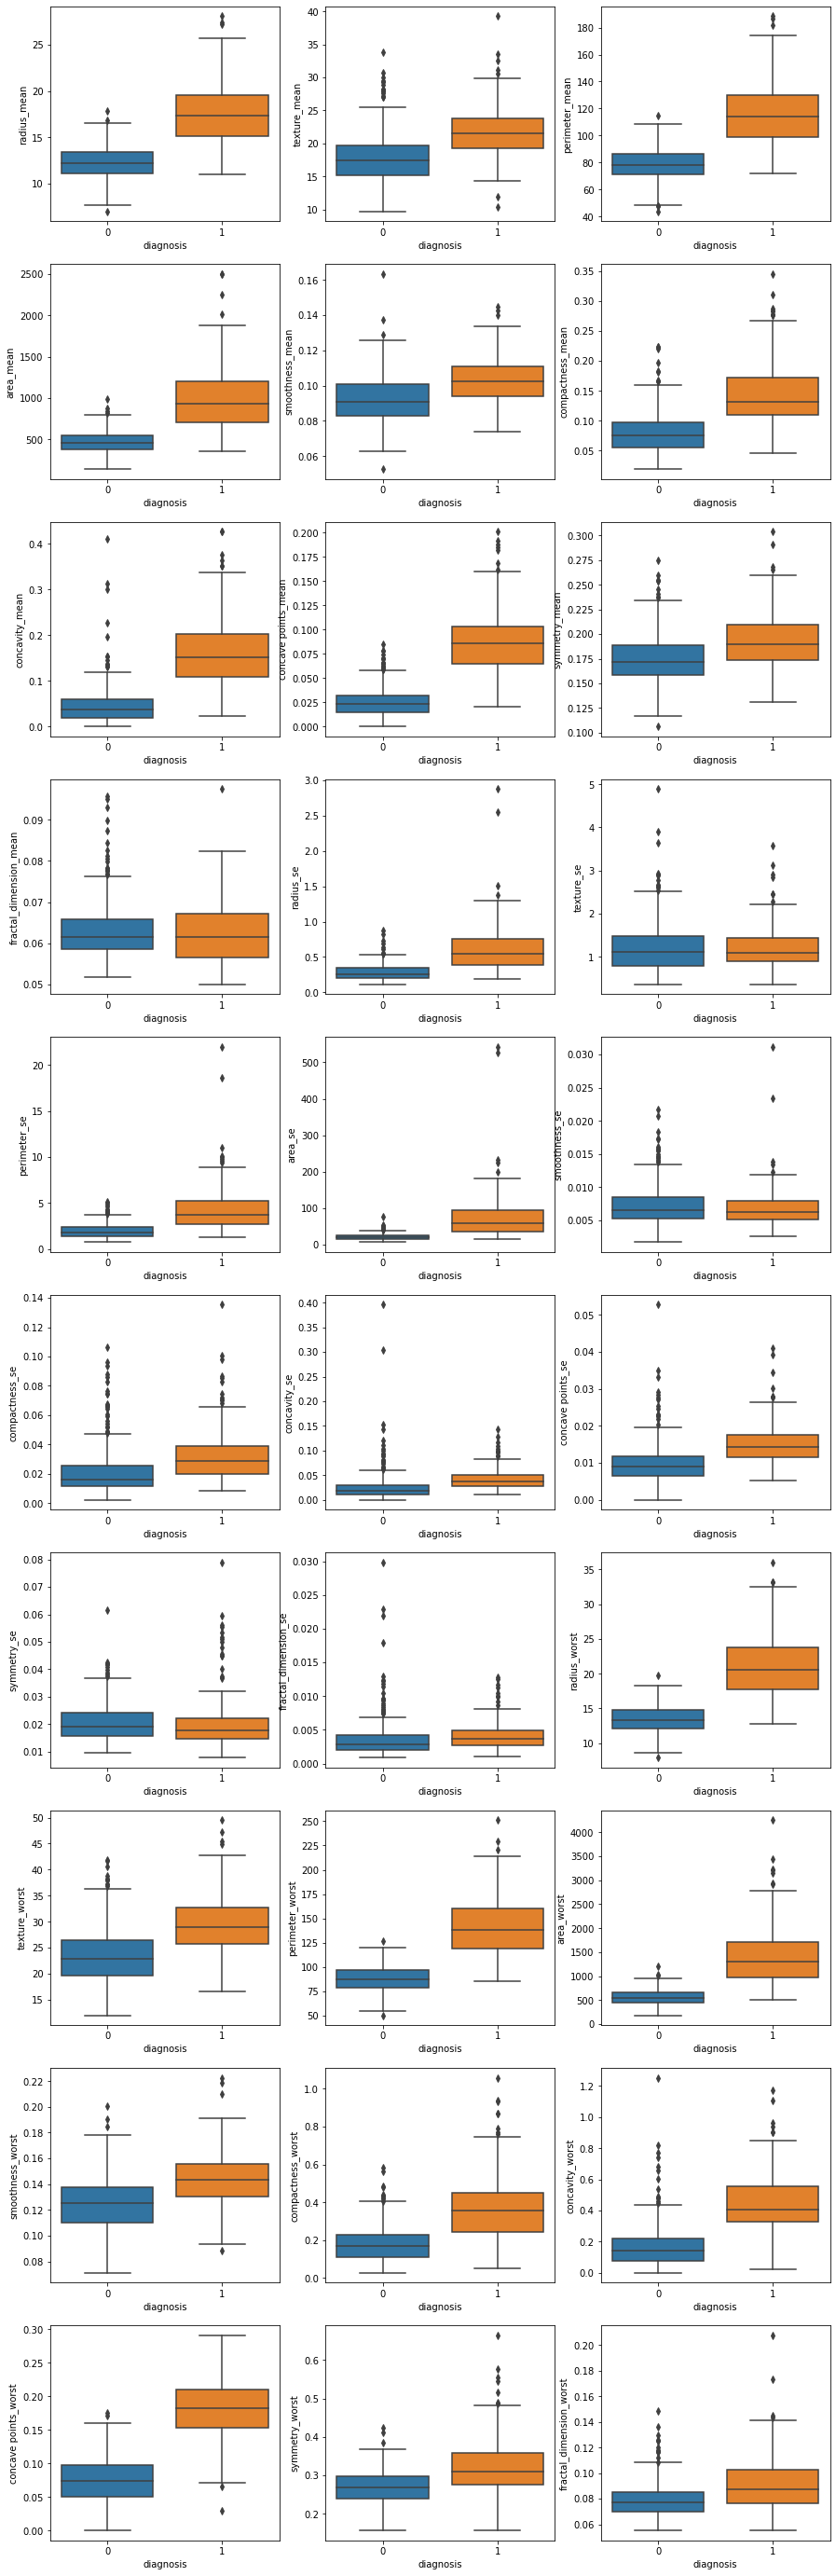

In [24]:
nrows = 10
ncols = 3
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for i in range(len(data.columns[2:])):
    lb = 'boxplot для целнвого признака и ' + str(data.columns[2+i])
    sns.boxplot(data=data, x = 'diagnosis', y=data.columns[2+i], ax = ax[i//ncols,i%ncols])
    ax1.title.set_text(lb)
plt.show()

Видим, что наиболее удобно было бы отделить злокачественные от доброкачественных опухолей использя такие признаки, как среднй радиус(соотвественно периметр и площадь), компактность_средняя. Очень хорошо делится целевой признак по признаку вогнуость среднняя, и количество вогнутых точек средее и наибольшее. 

# Часть 2. Моделирование при помощи kNN

разбиваем модель на train-test в сотношении 70,30 с параметром stratify по целевой переменной

In [25]:
X_train, X_test, y_train, y_test = train_test_split (
    data.iloc[:,2:], data['diagnosis'], test_size = 0.3, random_state = 49, stratify = data['diagnosis']
)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [27]:
y_train.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

прошкалируем признаки,т.е. приведем к единому масштабу

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Единый масштаб нужен для того, чтобы придать им единый вес при обучении модели, чтобы дистанция между признаками не сильно зависела от одних признаков, и слабо от других.

Создадим функцию оценки качества модели

In [30]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Accuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(
        accuracy, precision, recall, f1
    ))

### Построим модель Knn из "коробки"

In [31]:
knn_box = KNeighborsClassifier()
knn_box.fit(X_train_scaled, y_train)
y_pred_train = knn_box.predict(X_train_scaled)
y_pred_test = knn_box.predict(X_test_scaled)

In [32]:
knn_box.n_neighbors

5

In [33]:
quality(y_pred_train, y_train) #для train выборки

Accuracy:  0.970
Precision: 0.932
Recall:    0.986
F1-score:  0.958


In [34]:
quality(y_pred_test, y_test) #для test выборки

Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960


In [35]:
#функция построения кривой roc_auc
def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()

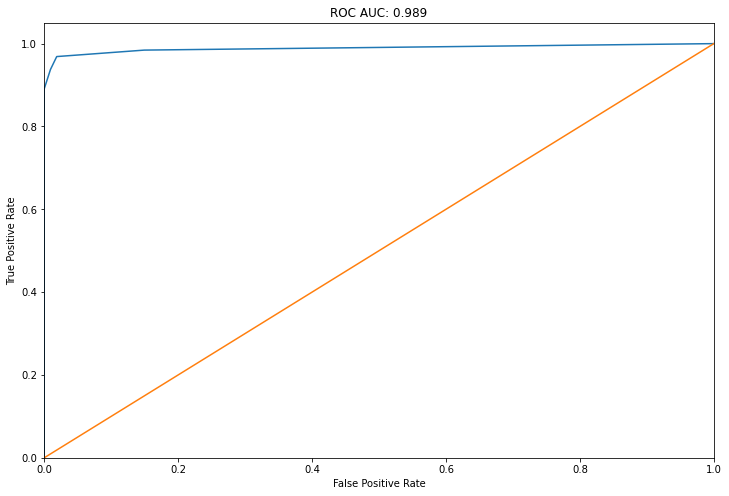

In [36]:
plot_roc_curve(knn_box.predict_proba(X_test_scaled)[:,1], y_test)

### проведем настройку параметра числа соседей и параметра p на кросс-валидации

In [37]:
%%time

param_grid = {
        'n_neighbors': range(1, 50),
        'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
) 

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))
print("Best p: {:.3f}".format(grid_search.best_estimator_.p))

Best CV score: 0.954, best CV k: 3
Resulting test score: 0.952
Best p: 3.000
Wall time: 26.3 s


In [38]:
#результаты grid_search
quality(test_predictions, y_test)

Accuracy:  0.965
Precision: 0.922
Recall:    0.983
F1-score:  0.952


In [39]:
#сравним c результатами "из коробки"
quality(y_pred_test, y_test)

Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960


как видим, результаты после кроссвалидации, настройки числа p и числа соседей не улучшили результат. Вероятно из-за того, что выборка не велика.
Построим ROC_AUC кривую для grid_search

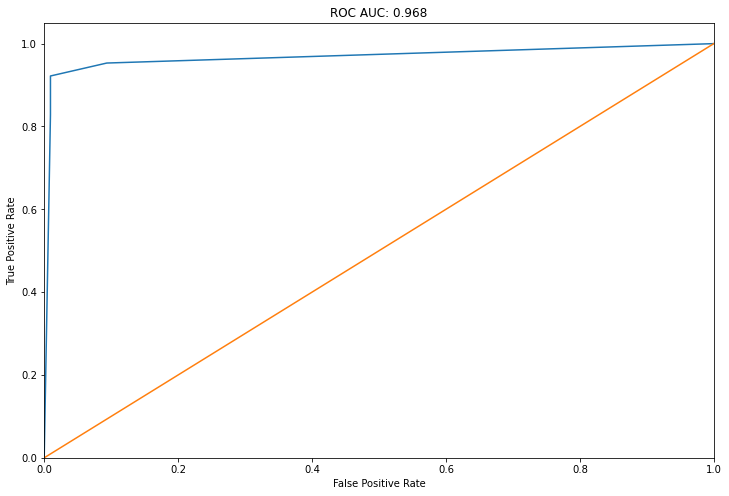

In [40]:
plot_roc_curve(grid_search.predict_proba(X_test_scaled)[:,1], y_test)

# Бонусное задание. Логистическая регрессия

сначала уберем те признаки, корреляция между которыми превышает 0,85:

In [41]:
corr_85 = []
for i in corr:
    for j in corr.index[corr[i] > 0.85]:
        if i != j and [j,i] not in corr_85:
            corr_85.append([i,j])

In [42]:
corr_85

[['radius_mean', 'perimeter_mean'],
 ['radius_mean', 'area_mean'],
 ['radius_mean', 'radius_worst'],
 ['radius_mean', 'perimeter_worst'],
 ['radius_mean', 'area_worst'],
 ['texture_mean', 'texture_worst'],
 ['perimeter_mean', 'area_mean'],
 ['perimeter_mean', 'concave points_mean'],
 ['perimeter_mean', 'radius_worst'],
 ['perimeter_mean', 'perimeter_worst'],
 ['perimeter_mean', 'area_worst'],
 ['area_mean', 'radius_worst'],
 ['area_mean', 'perimeter_worst'],
 ['area_mean', 'area_worst'],
 ['compactness_mean', 'concavity_mean'],
 ['compactness_mean', 'compactness_worst'],
 ['concavity_mean', 'concave points_mean'],
 ['concavity_mean', 'concavity_worst'],
 ['concavity_mean', 'concave points_worst'],
 ['concave points_mean', 'perimeter_worst'],
 ['concave points_mean', 'concave points_worst'],
 ['radius_se', 'perimeter_se'],
 ['radius_se', 'area_se'],
 ['perimeter_se', 'area_se'],
 ['radius_worst', 'perimeter_worst'],
 ['radius_worst', 'area_worst'],
 ['perimeter_worst', 'area_worst'],
 [

In [43]:
# удалять будем превый признак из парных корелций > 0,85
col_to_del = []
for i in corr_85:
    col_to_del.append(i[0])
col_to_del = list(set(col_to_del))

In [44]:
col_to_del

['compactness_worst',
 'radius_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'radius_worst',
 'concavity_worst',
 'radius_se',
 'perimeter_se',
 'texture_mean',
 'concave points_mean',
 'perimeter_worst',
 'concavity_mean']

In [45]:
#удаляем сильнокоррелированные признаки
data_log = data.drop(columns=col_to_del)

In [46]:
data_log.head()

,id,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,0.11840,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,2019.0,0.1622,0.2654,0.4601,0.11890
1,842517,1,0.08474,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,1956.0,0.1238,0.1860,0.2750,0.08902
2,84300903,1,0.10960,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,1709.0,0.1444,0.2430,0.3613,0.08758
3,84348301,1,0.14250,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,567.7,0.2098,0.2575,0.6638,0.17300
4,84358402,1,0.10030,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,1575.0,0.1374,0.1625,0.2364,0.07678


In [47]:
corr_log = data_log.corr()

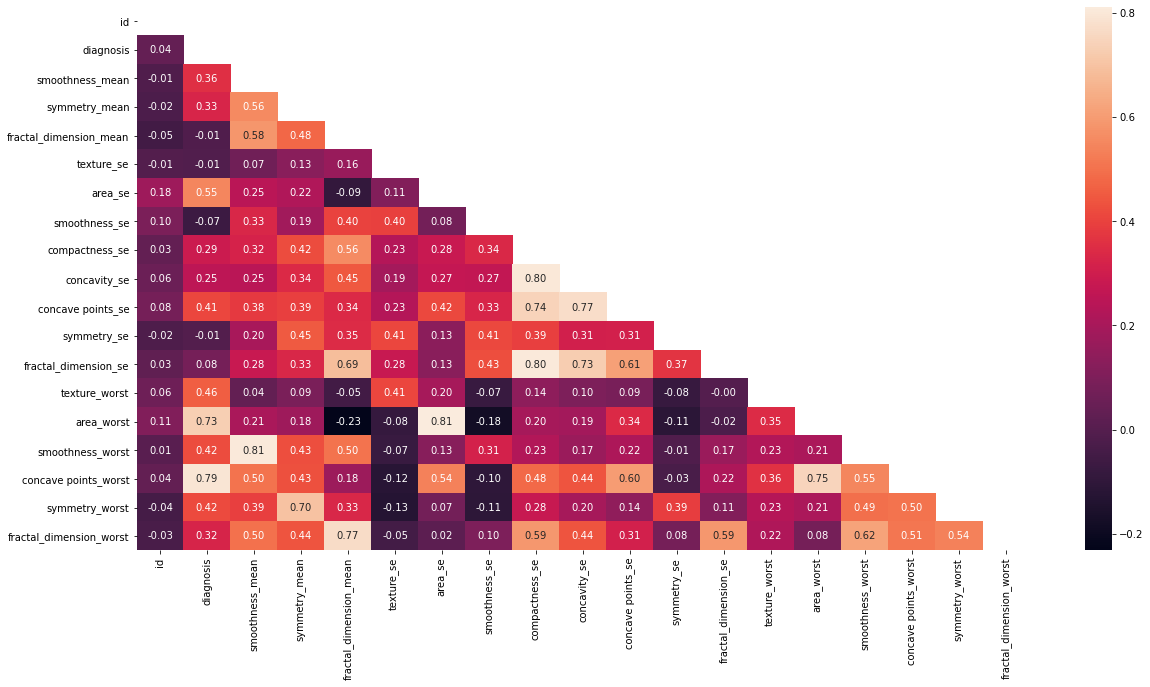

In [48]:
plt.figure(figsize=(20,10));
sns.heatmap(corr_log, annot=True, fmt='.2f',  mask = np.triu(np.ones_like(corr_log, dtype=bool)));

In [49]:
data_log.shape

(569, 19)

In [50]:
data.shape

(569, 32)

### логистическая регрессия "из коробки"

In [51]:
# train-test split
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split (
    data_log.iloc[:,2:], data_log['diagnosis'], test_size = 0.3, random_state = 49, stratify = data_log['diagnosis']
)

# стандартизируем
scaler = StandardScaler()

X_train_scaled_log = scaler.fit_transform(X_train_log)
X_test_scaled_log = scaler.transform(X_test_log)


In [52]:
X_train_log.shape, X_test_log.shape, y_train_log.shape, y_test_log.shape

((398, 17), (171, 17), (398,), (171,))

In [53]:
y_train_log.value_counts(normalize=True)

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [54]:
y_test_log.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

In [55]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled_log, y_train_log)
print("Train quality:")
quality(log_reg.predict(X_train_scaled_log), y_train_log)
print("\nTest quality:")
quality(log_reg.predict(X_test_scaled_log), y_test_log)

Train quality:
Accuracy:  0.975
Precision: 0.946
Recall:    0.986
F1-score:  0.966

Test quality:
Accuracy:  0.977
Precision: 0.953
Recall:    0.984
F1-score:  0.968


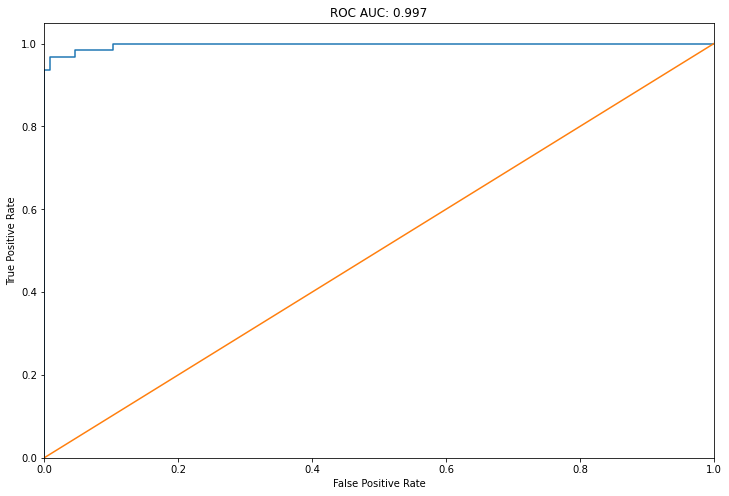

In [56]:
#ROC_AUC для логистической регрессии
plot_roc_curve(log_reg.predict_proba(X_test_scaled_log)[:,1], y_test_log)

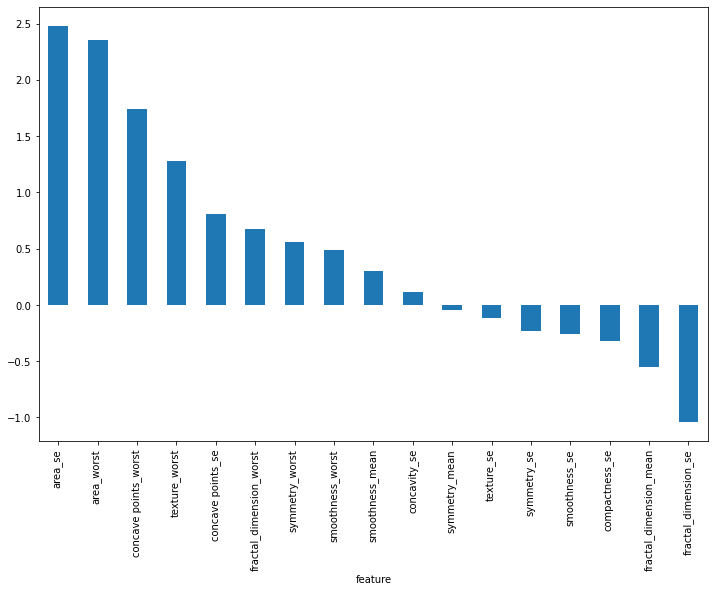

In [57]:
#влияние признаков
featureImportance = pd.DataFrame({"feature": data_log.iloc[:,2:].columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

### логистическая регрессия с настройкой параметра регуляризации на кросс-валидации

In [58]:
clf = LogisticRegressionCV(cv=5, random_state=49, scoring='f1', max_iter = 100000).fit(X_train_scaled_log, y_train_log)

In [59]:
print("Train quality:")
quality(clf.predict(X_train_scaled_log), y_train_log)
print("\nTest quality:")
quality(clf.predict(X_test_scaled_log), y_test_log)

Train quality:
Accuracy:  0.970
Precision: 0.932
Recall:    0.986
F1-score:  0.958

Test quality:
Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960


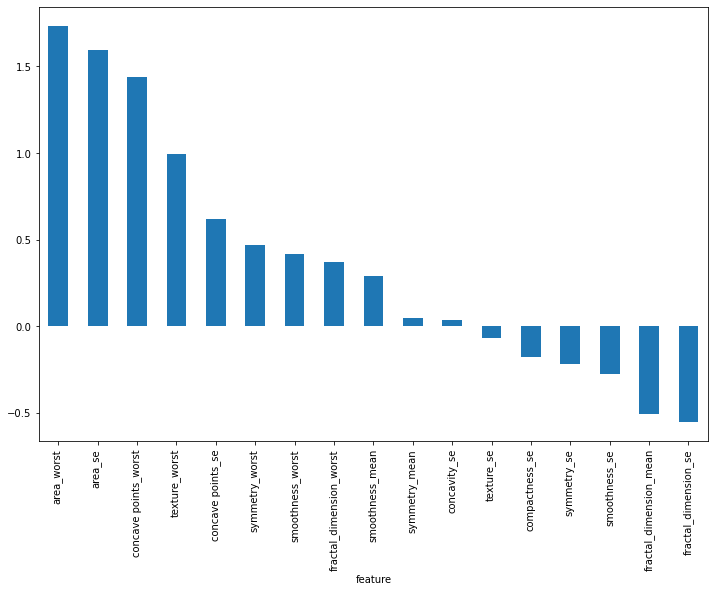

In [60]:
#влияние признаков
featureImportance = pd.DataFrame({"feature": data_log.iloc[:,2:].columns, 
                                  "importance": clf.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

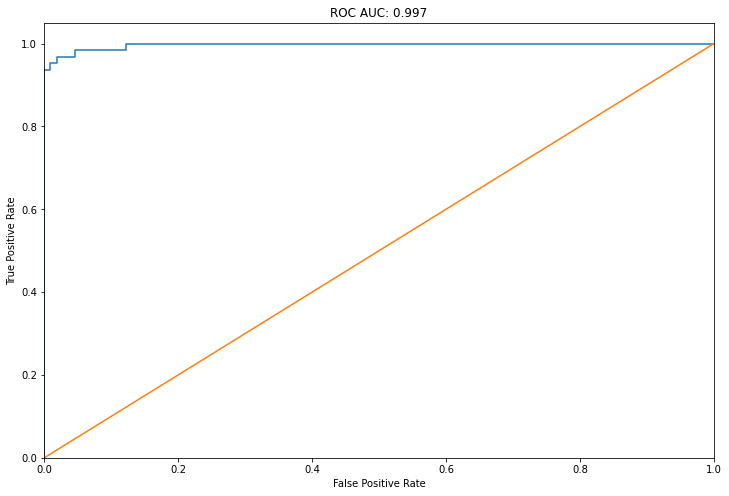

In [61]:
#ROC_AUC для логистической регрессии с настройкой параметра регуляризации
plot_roc_curve(clf.predict_proba(X_test_scaled_log)[:,1], y_test_log)

# Сравним все результаты

In [62]:
#knn из коробки
quality(knn_box.predict(X_test_scaled), y_test)
print('ROC_AUC score:', round(roc_auc_score(y_test, (knn_box.predict_proba(X_test_scaled)[:,1])),3))

Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960
ROC_AUC score: 0.989


In [63]:
#knn grid search
quality(grid_search.predict(X_test_scaled), y_test)
print('ROC_AUC score:', round(roc_auc_score(y_test, (grid_search.predict_proba(X_test_scaled)[:,1])),3))

Accuracy:  0.965
Precision: 0.922
Recall:    0.983
F1-score:  0.952
ROC_AUC score: 0.968


In [64]:
#logreg из коробки
quality(log_reg.predict(X_test_scaled_log), y_test_log)
print('ROC_AUC score:', round(roc_auc_score(y_test_log, (log_reg.predict_proba(X_test_scaled_log)[:,1])),3))

Accuracy:  0.977
Precision: 0.953
Recall:    0.984
F1-score:  0.968
ROC_AUC score: 0.997


In [65]:
#logreg с настройкой регулярицации
quality(clf.predict(X_test_scaled_log), y_test_log)
print('ROC_AUC score:', round(roc_auc_score(y_test_log, (clf.predict_proba(X_test_scaled_log)[:,1])),3))

Accuracy:  0.971
Precision: 0.938
Recall:    0.984
F1-score:  0.960
ROC_AUC score: 0.997


# Выводы

Видим интересные результаты. На кросс-валидации наши модели получили результаты хуже, чем без нее.
Интересно отметить, что результат knn из коробки совпадает с результатом логистической регрессии с настройкой регуляризации (кроме параметра ROC_AUC).
Если говорить о настроенных моделях, то логистическая регрессия оказалась лучше knn.